# Customer sign-up project.
#### Marketing campaigns data of a Portuguese banking institution!

# Overview
A Portuguese bank hired me to create a model which predicts customers who might sign up for a marketing campaign. I  concluded that many features determine the outcome. Some data was missing.

I have made data cleaning and EDA to determine the main features. Check for null values and outliers. 

To achieve my goal, I trained more than 100 models and tuned hyperparameters, model types that were used: 
- LogisticRegression
- KNN
- Naive Bayes
- decision tree
- Random Forest
- ADA Boost
- Gradient boost

For different models, I calculated the cost and revenue of marketing. 

I have changed the decision boundaries of the last model to determine the best economic impact. As a result, I have achieved better economic parameters compared to default actions without ML algorithms. 

For illustration purposes, I made simulations of how model parameters can be adjusted to maximize revenue with different contact values and income per sign-up person. 


# Business Understanding
In this project, we use the direct marketing campaigns data of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the client.  
The goal is to predict if the client will subscribe to a term product (variable Y).
There is a cost associated with each call and average revenue from each sign-up customer.


# Data

1) Data collected from one of the marketing campaigns
Provided by the customer
Data covering period interval from March to December


# Metrics
#### Our project will answer the following question:
Can we predict that customers will subscribe to bank products?

#### Hypothesis:
H0 - Customer will not subscribe

HA - There is significant evidence that customers will subscribe to our services.

#### TP, TN, FP, FN definition
TP - We predicted that customers subscribe, and it happened

TN - We predicted that customers wouldn't subscribe, and it didn't happen

FP - We predicted that customers would subscribe, but they didn't.

FN - We predicted that customers not subscribed, but they subscribed. 


#### Metrics used  
To compare models, we will focus on 2 major metrics:

Accuracy - how well we can predict TP and TN. General metrics that will show model performance.

Recall - We work under the assumption that the cost of contact is lower compared to the possible profit of the customer signed. So we are interested in catching as many potential signed-up customers and minimizing FN. So I will use recall as the second metric.

#### Used costs:
Customer call - 5 US dollars

Average revenue - 200 US dollars



# Data Understanding

#### Main dataset contains the following columns:

###### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

###### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

###### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Data Cleaning
### Importing required modules

In [1]:
# Work with data
import pandas as pd
import numpy as np
from scipy import stats as stats

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, plot_roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Other
import time

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
simplefilter(action='ignore', category= FutureWarning)
simplefilter(action='ignore', category= ConvergenceWarning)
simplefilter(action='ignore', category= FitFailedWarning)
simplefilter(action='ignore', category= UserWarning)

In [2]:
# Basic configuration
class config():
    def __init__(self):
        self.cost = 5
        self.revenue = 200
    
conf = config()

### Importing data

In [3]:
df = pd.read_csv("./data/Casestudy Data.csv")

##### 1) Data Inspection

In [4]:
# Check how data looks
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [5]:
# Check the shape of data
print(f"The number of records(raws) {df.shape[0]}")
print(f"The number of features(columns) {df.shape[1]}")

The number of records(raws) 41188
The number of features(columns) 21


In [6]:
# Check numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37444.0,39.999947,10.414908,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,36040.0,93.575575,0.579216,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
# How many values are missing
df.isna().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
# Check how many uniue values and normalize missing data for better perception
def checker(df):
    for column in df.columns:
        print(f"{round((1-df[column].isna().sum()/len(df[column]))*100, 2)}% of data exist, N of unique parameters: {len(df[column].value_counts().keys())} in column {column}")

print("Dataset general information:")        
checker(df)

Dataset general information:
90.91% of data exist, N of unique parameters: 78 in column age
100.0% of data exist, N of unique parameters: 12 in column job
100.0% of data exist, N of unique parameters: 4 in column marital
100.0% of data exist, N of unique parameters: 8 in column education
100.0% of data exist, N of unique parameters: 3 in column default
100.0% of data exist, N of unique parameters: 3 in column housing
100.0% of data exist, N of unique parameters: 3 in column loan
100.0% of data exist, N of unique parameters: 2 in column contact
100.0% of data exist, N of unique parameters: 10 in column month
100.0% of data exist, N of unique parameters: 5 in column day_of_week
100.0% of data exist, N of unique parameters: 1544 in column duration
100.0% of data exist, N of unique parameters: 42 in column campaign
100.0% of data exist, N of unique parameters: 27 in column pdays
100.0% of data exist, N of unique parameters: 8 in column previous
100.0% of data exist, N of unique parameters:

In [9]:
for column in df.columns:
        print("-------------")
        print(f"Column : {column}")
        print(df[column].value_counts().head(10))

-------------
Column : age
31.0    1782
33.0    1687
32.0    1672
36.0    1625
35.0    1598
34.0    1577
30.0    1570
37.0    1350
29.0    1327
39.0    1295
Name: age, dtype: int64
-------------
Column : job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
Name: job, dtype: int64
-------------
Column : marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-------------
Column : education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-------------
Column : default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--

<AxesSubplot:>

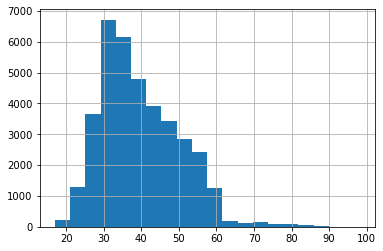

In [10]:
(df["age"]).hist(bins=20)

In [11]:
df["cons.price.idx"].value_counts(normalize=True)

93.994    0.188319
93.918    0.162764
92.893    0.139900
93.444    0.125000
94.465    0.106326
93.200    0.087569
93.075    0.060488
92.201    0.018951
92.963    0.017203
92.431    0.011043
92.649    0.008574
94.215    0.007492
94.199    0.007464
92.843    0.006853
93.369    0.006659
92.379    0.006382
94.055    0.005633
94.027    0.005383
93.876    0.005022
94.601    0.004994
92.469    0.004550
93.749    0.004495
92.713    0.004079
94.767    0.002997
93.798    0.001665
92.756    0.000194
Name: cons.price.idx, dtype: float64

<AxesSubplot:>

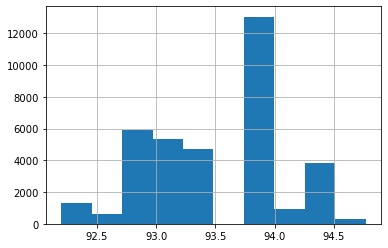

In [12]:
df["cons.price.idx"].hist(bins = 10)

In [13]:
# Check when both rows have missing values.
df[df.age.isna()]["cons.price.idx"].isna().value_counts()
# Both have missing values in rare cases.

False    3268
True      476
Name: cons.price.idx, dtype: int64

In [14]:
# Check when both rows have missing values and outcome of these marketing campaigns. 
print("Normal data, marketing campaign outcome:")
print(df["y"].value_counts(normalize=True))
print("Both columns missing data, marketing campaign outcome:")
print(df[(df.age.isna() & df["cons.price.idx"].isna())]["y"].value_counts(normalize=True))

Normal data, marketing campaign outcome:
no     0.887346
yes    0.112654
Name: y, dtype: float64
Both columns missing data, marketing campaign outcome:
no     0.878151
yes    0.121849
Name: y, dtype: float64


In [15]:
# Predicted class imbalance:
df["y"].value_counts(normalize = True)
# We can see that only 11.2% of customers signed. We have class imbalance problem. 

no     0.887346
yes    0.112654
Name: y, dtype: float64

### Data Engineering

##### Outcome

In [16]:
# Change outcome type
df["y"] = df["y"].map({"yes":1, "no":0})

In [17]:
df["y"].value_counts(normalize = True)

0    0.887346
1    0.112654
Name: y, dtype: float64

##### Missing values

In [18]:
# Consumer price index
df["cons.price.idx"].value_counts()

93.994    6787
93.918    5866
92.893    5042
93.444    4505
94.465    3832
93.200    3156
93.075    2180
92.201     683
92.963     620
92.431     398
92.649     309
94.215     270
94.199     269
92.843     247
93.369     240
92.379     230
94.055     203
94.027     194
93.876     181
94.601     180
92.469     164
93.749     162
92.713     147
94.767     108
93.798      60
92.756       7
Name: cons.price.idx, dtype: int64

In [19]:
df["cons.price.idx"][7750:7800]

7750    93.994
7751       NaN
7752    93.994
7753    93.994
7754    93.994
7755    93.994
7756    93.994
7757    93.994
7758    93.994
7759       NaN
7760    93.994
7761    93.994
7762    93.994
7763    94.465
7764    94.465
7765    94.465
7766    94.465
7767    94.465
7768       NaN
7769    94.465
7770    94.465
7771    94.465
7772    94.465
7773       NaN
7774    94.465
7775    94.465
7776    94.465
7777    94.465
7778    94.465
7779    94.465
7780    94.465
7781    94.465
7782    94.465
7783    94.465
7784    94.465
7785       NaN
7786    94.465
7787    94.465
7788    94.465
7789    94.465
7790    94.465
7791    94.465
7792    94.465
7793    94.465
7794    94.465
7795    94.465
7796       NaN
7797    94.465
7798    94.465
7799    94.465
Name: cons.price.idx, dtype: float64

In [20]:
sum(list(df["cons.price.idx"][df["cons.price.idx"].isna()].index < 20000))

# Consumer price index is filled after constant period of time and stay constant in fixed time frame
# As we can see our records also filled in timely manner.
# Missing values of consumer price index are randomly situated in our records.
# We have reported 10 month, and 26 unique values of consumer price index, that doesn't correspond to weekly, biweekly or monthly change
# We will use bfill strategy to fill NA values

2490

In [21]:
df["cons.price.idx"].fillna(method = "bfill", inplace = True)

In [22]:
df["cons.price.idx"][7750:7800]

7750    93.994
7751    93.994
7752    93.994
7753    93.994
7754    93.994
7755    93.994
7756    93.994
7757    93.994
7758    93.994
7759    93.994
7760    93.994
7761    93.994
7762    93.994
7763    94.465
7764    94.465
7765    94.465
7766    94.465
7767    94.465
7768    94.465
7769    94.465
7770    94.465
7771    94.465
7772    94.465
7773    94.465
7774    94.465
7775    94.465
7776    94.465
7777    94.465
7778    94.465
7779    94.465
7780    94.465
7781    94.465
7782    94.465
7783    94.465
7784    94.465
7785    94.465
7786    94.465
7787    94.465
7788    94.465
7789    94.465
7790    94.465
7791    94.465
7792    94.465
7793    94.465
7794    94.465
7795    94.465
7796    94.465
7797    94.465
7798    94.465
7799    94.465
Name: cons.price.idx, dtype: float64

In [23]:
# Age

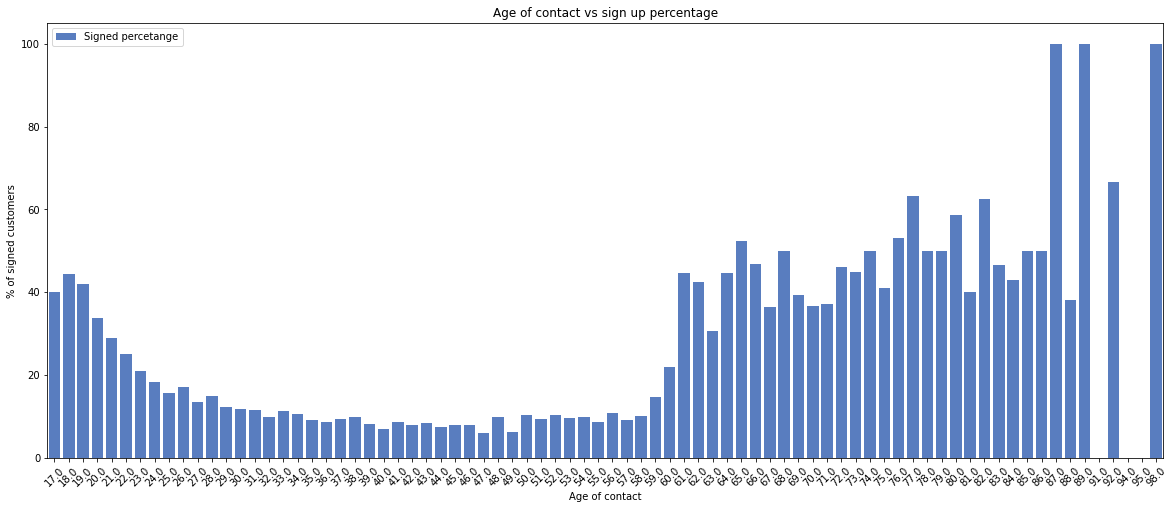

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("age")["y"].sum().index, 
            y =  df.groupby("age")["y"].sum()/df.groupby("age")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Age of contact")
ax.set_ylabel("% of signed customers")
ax.set_title("Age of contact vs sign up percentage")
ax.set_xticklabels(df.groupby("age")["y"].sum().index, rotation = 45)
plt.savefig("./img/EDA_age.png")

In [25]:
# Age bins:
group_gap = 3
bins_age = list(range(17,99,group_gap))
df["new_age"] = pd.cut(x = df.age, bins = bins_age)
# Fill missing age with new category - Unknown
df["new_age"] = df["new_age"].cat.add_categories("Unknown").fillna("Unknown").astype("string").astype("object")
# Drop "old" age 
df.drop("age", axis = 1, inplace = True)

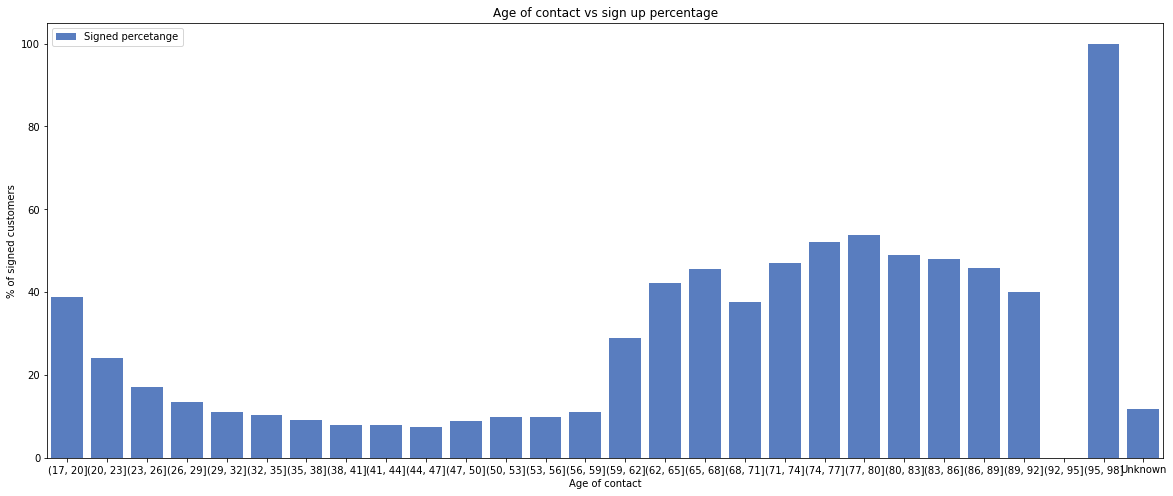

In [26]:
# Try to preserve structure but keep less number of groups. 
fig, ax = plt.subplots(figsize=(20, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("new_age")["y"].sum().index, 
            y =  df.groupby("new_age")["y"].sum()/df.groupby("new_age")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Age of contact")
ax.set_ylabel("% of signed customers")
ax.set_title("Age of contact vs sign up percentage")
plt.savefig("./img/EDA_age_bins.png")

In [27]:
print("------------------------")
print(f"The number of missing values - {df.isna().sum().sum()}")
print("------------------------")

------------------------
The number of missing values - 0
------------------------


##### Multicollinearity issues.


<AxesSubplot:>

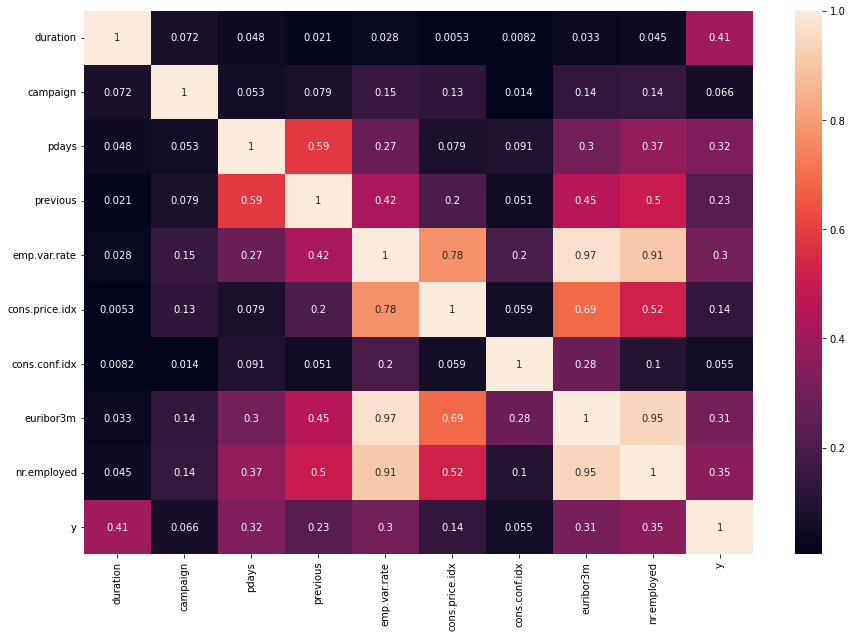

In [28]:
fig,axs = plt.subplots(1,1,figsize = (15,10))
sns.heatmap(np.abs(df.corr()), annot = True, ax = axs)

<AxesSubplot:>

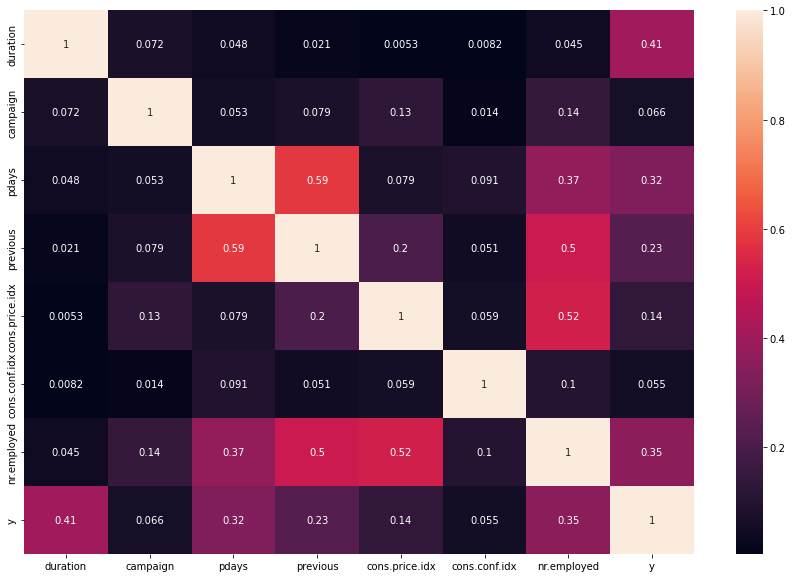

In [29]:
# High correlation between eurobor3m, nr.employed, emp.var.rate, cons.price.ind. 
# Remove some of them to takle multicollinearity. 
list_to_drop= ["emp.var.rate", "euribor3m"]
df = df.drop(list_to_drop, axis = 1)
fig,axs = plt.subplots(1,1,figsize = (15,10))
sns.heatmap(np.abs(df.corr()), annot = True, ax = axs)

In [30]:
# Drop duration
# # Shoud be removed. 
# # Duration - log transformation + remove 0 values.
df.drop("duration", axis = 1, inplace = True)

##### column investigation

In [31]:
# Number of contacts
np.cumsum(df['campaign'].value_counts())/len(df['campaign'])

1     0.428329
2     0.684957
3     0.814630
4     0.878994
5     0.917816
6     0.941585
7     0.956856
8     0.966568
9     0.973439
10    0.978902
11    0.983199
12    0.986234
13    0.988468
14    0.990143
17    0.991551
16    0.992789
15    0.994027
18    0.994829
20    0.995557
19    0.996188
21    0.996771
22    0.997184
23    0.997572
24    0.997936
27    0.998203
29    0.998446
28    0.998640
26    0.998835
25    0.999029
31    0.999199
30    0.999369
35    0.999490
32    0.999587
33    0.999684
34    0.999757
42    0.999806
40    0.999854
43    0.999903
56    0.999927
39    0.999951
41    0.999976
37    1.000000
Name: campaign, dtype: float64

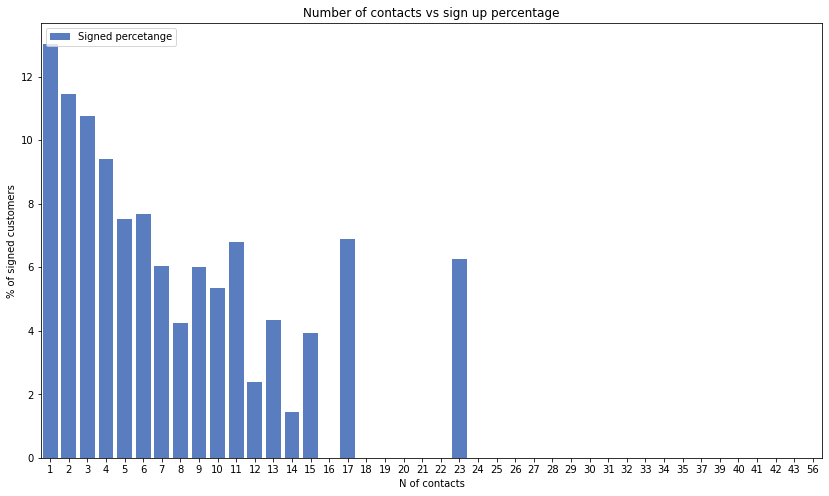

In [32]:

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("campaign")["y"].sum().index, 
            y =  df.groupby("campaign")["y"].sum()/df.groupby("campaign")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of contacts vs sign up percentage")
plt.savefig("./img/campaign.png")

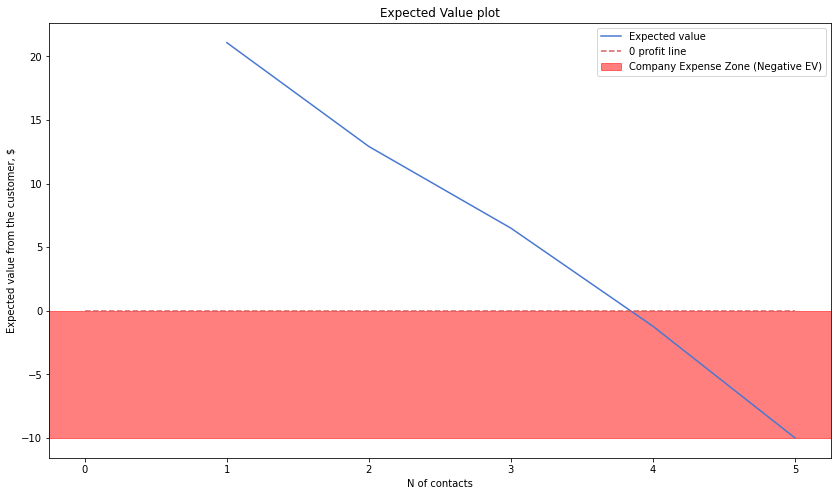

<Figure size 432x288 with 0 Axes>

In [33]:
# Calculate Expected value of customer depending on number of calls.
percentage = df.groupby("campaign")["y"].sum()/df.groupby("campaign")["y"].count()
number_of_calls = list(percentage.index)

list_EV = []
for i in number_of_calls:
    EV = percentage[i] * conf.revenue - i * conf.cost
    list_EV.append(EV)
    
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(number_of_calls[0:5], list_EV[0:5], color = "b", label = "Expected value")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("Expected value from the customer, $")
ax.set_title("Expected Value plot")
ax.hlines(y=0, xmin=0, xmax=5, linestyles = "--", color = "r", label = "0 profit line")
ax.axhspan(0, -10, alpha=0.5, color='red', label = "Company Expense Zone (Negative EV)")
plt.legend()
plt.show()
plt.savefig("./img/Expected_value.png")

In [34]:
# Education

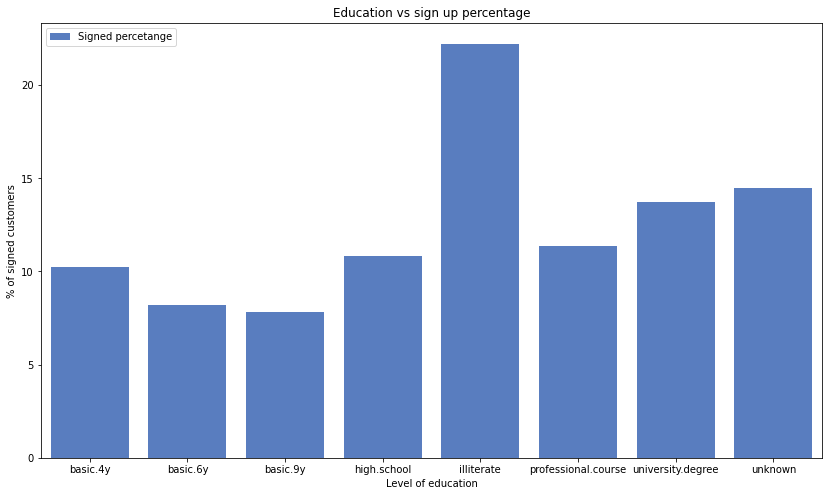

In [35]:
df.fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("education")["y"].sum().index, 
            y =  df.groupby("education")["y"].sum()/df.groupby("education")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Level of education")
ax.set_ylabel("% of signed customers")
ax.set_title("Education vs sign up percentage")
plt.savefig("./img/education.png")

In [36]:
# Pdays
df["pdays"].value_counts(normalize = True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

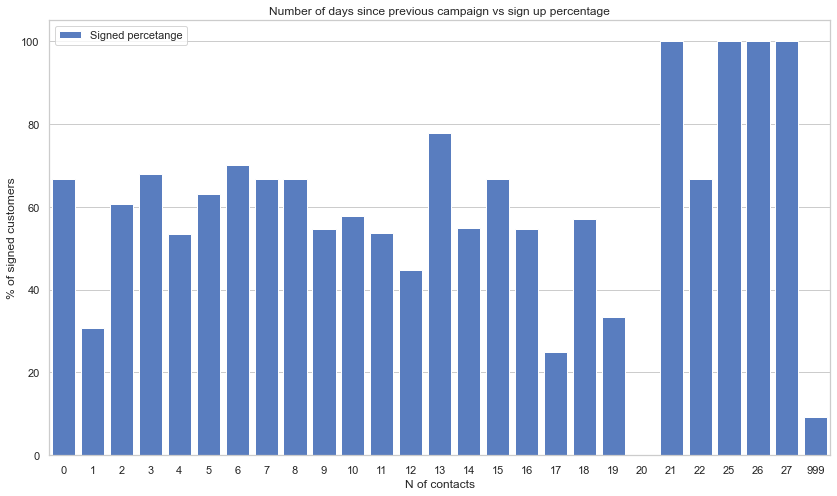

In [37]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("pdays")["y"].sum().index, 
            y =  df.groupby("pdays")["y"].sum()/df.groupby("pdays")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of days since previous campaign vs sign up percentage")
plt.savefig("./img/pdays.png")

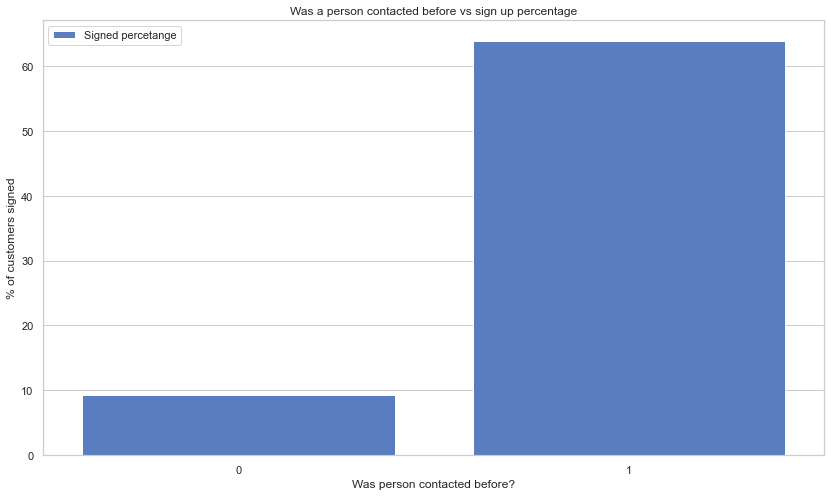

In [38]:
df["pdays_new"]= df["pdays"].map(lambda x : 0 if x==999 else 1)
df.drop("pdays", axis = 1, inplace = True)
x_labels = ["no", "yes"]
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("pdays_new")["y"].sum().index, 
            y =  df.groupby("pdays_new")["y"].sum()/df.groupby("pdays_new")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Was person contacted before?")
ax.set_ylabel("% of customers signed")
ax.set_title("Was a person contacted before vs sign up percentage")


plt.savefig("./img/days_new.png")

In [39]:
# poutcome
df["poutcome"].value_counts(normalize = True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

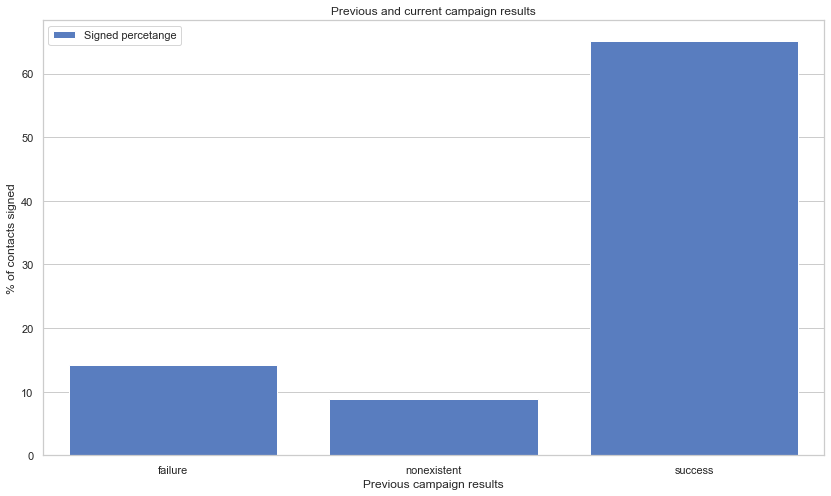

In [40]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["poutcome"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("poutcome")["y"].sum().index, 
            y =  df.groupby("poutcome")["y"].sum()/df.groupby("poutcome")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("Previous campaign results")
ax.set_ylabel("% of contacts signed")
ax.set_title("Previous and current campaign results")
plt.savefig("./img/previous_campaign.png")

In [41]:
# Month
df["month"].value_counts(normalize = True)

may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: month, dtype: float64

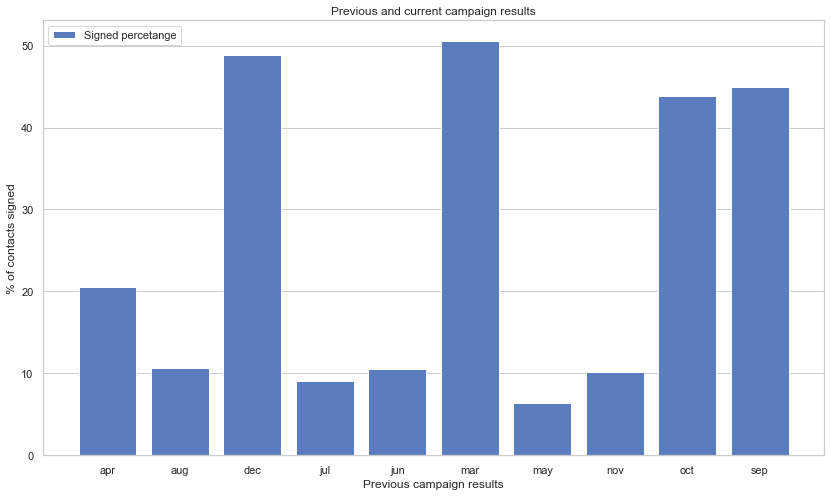

In [42]:
fig, axs = plt.subplots(figsize=(14, 8))
x_labels = list(df["month"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("month")["y"].sum().index, 
            y =  df.groupby("month")["y"].sum()/df.groupby("month")["y"].count()*100, 
            color = "b", label = "Signed percetange", ax = axs)
sns.lineplot(data = df, x = df["month"],
            y = df["month"].value_counts(), ax = axs)
axs.legend(ncol=2, loc="upper left", frameon=True)
axs.set_xlabel("Previous campaign results")
axs.set_ylabel("% of contacts signed")
axs.set_title("Previous and current campaign results")
plt.savefig("./img/previous_campaign.png")

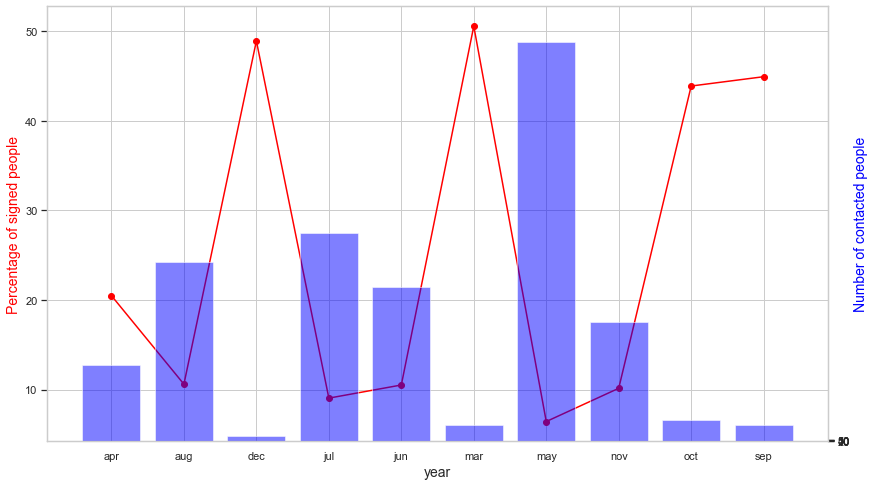

In [123]:

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(14, 8))
# make a plot
ax.plot(df.groupby("month")["y"].sum().index, df.groupby("month")["y"].sum()/df.groupby("month")["y"].count()*100, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Percentage of signed people",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(df.groupby("month")["y"].sum().index, df.groupby("month")["y"].count() ,color="blue", alpha = 0.5)
ax2.set_ylabel("Number of contacted people",color="blue",fontsize=14)
ax2.set_yticks([15000, 12000, 9000, 6000, 3000])
ax2.grid(False)
ax2.set_yticks([10, 20, 30, 40,50])

#ax.yaxis.set_major_locator(plt.AutoLocator())
#ax2.yaxis.set_major_locator(plt.AutoLocator())
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='png',
            dpi=100,
            bbox_inches='tight')

In [47]:
# poutcome
df["poutcome"].value_counts(normalize = True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

In [48]:
# Previous
df["previous"].value_counts(normalize = True)

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

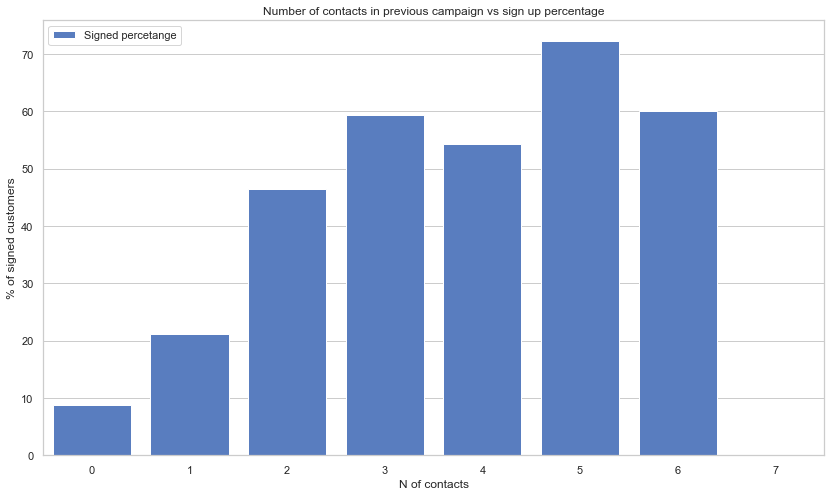

In [49]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("previous")["y"].sum().index, 
            y =  df.groupby("previous")["y"].sum()/df.groupby("previous")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of contacts in previous campaign vs sign up percentage")
plt.savefig("./img/EDA_previous.png")

In [50]:
# Month

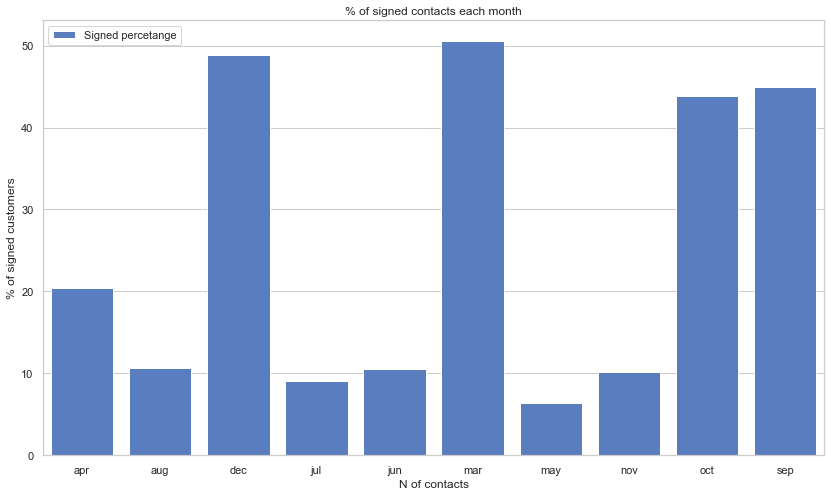

In [51]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["campaign"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("month")["y"].sum().index, 
            y =  df.groupby("month")["y"].sum()/df.groupby("month")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("% of signed contacts each month")
plt.savefig("./img/EDA2.png")

In [52]:
df["month"].value_counts(normalize = True)

may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: month, dtype: float64

In [53]:
list_to_drop= ["emp.var.rate", "euribor3m"]

In [54]:
# cons.price.idx

<AxesSubplot:>

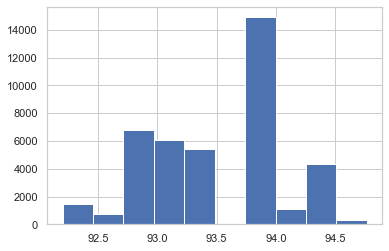

In [55]:
df["cons.price.idx"].hist(bins = 10)

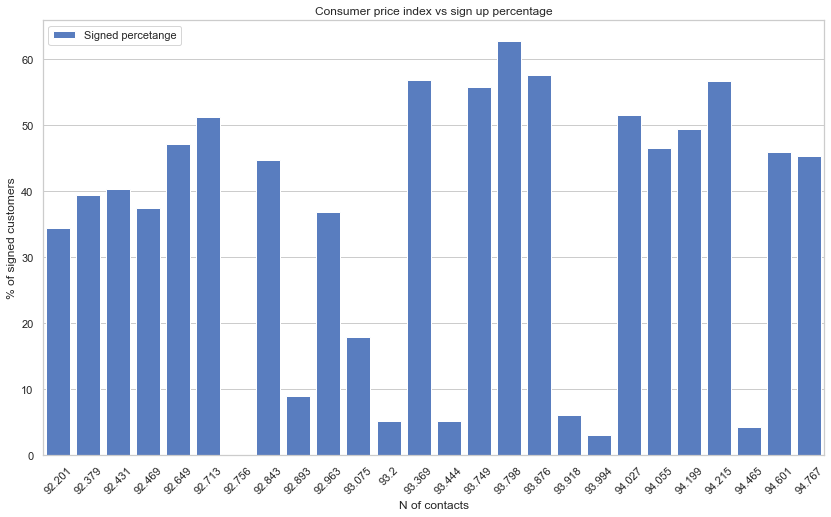

In [56]:
fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["poutcome"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("cons.price.idx")["y"].sum().index, 
            y =  df.groupby("cons.price.idx")["y"].sum()/df.groupby("cons.price.idx")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Consumer price index vs sign up percentage")
ax.set_xticklabels(df.groupby("cons.price.idx")["y"].sum().index, rotation = 45)
plt.savefig("./img/EDA2.png")

In [57]:
# cons.conf.idx

<AxesSubplot:>

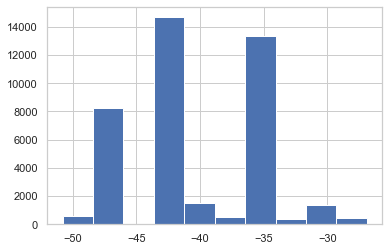

In [58]:
df["cons.conf.idx"].hist(bins = 10)

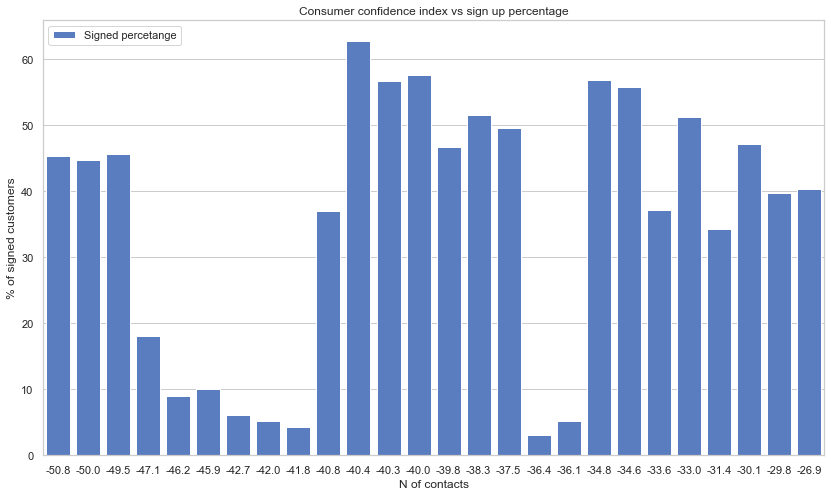

In [59]:
fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["poutcome"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("cons.conf.idx")["y"].sum().index, 
            y =  df.groupby("cons.conf.idx")["y"].sum()/df.groupby("cons.conf.idx")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Consumer confidence index vs sign up percentage")
plt.savefig("./img/EDA2.png")

In [60]:
# nr.employed

<AxesSubplot:>

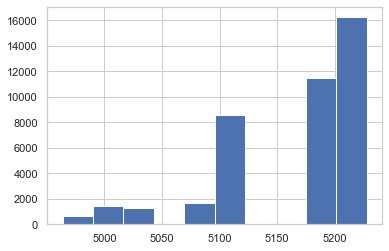

In [61]:
df["nr.employed"].hist(bins = 10)

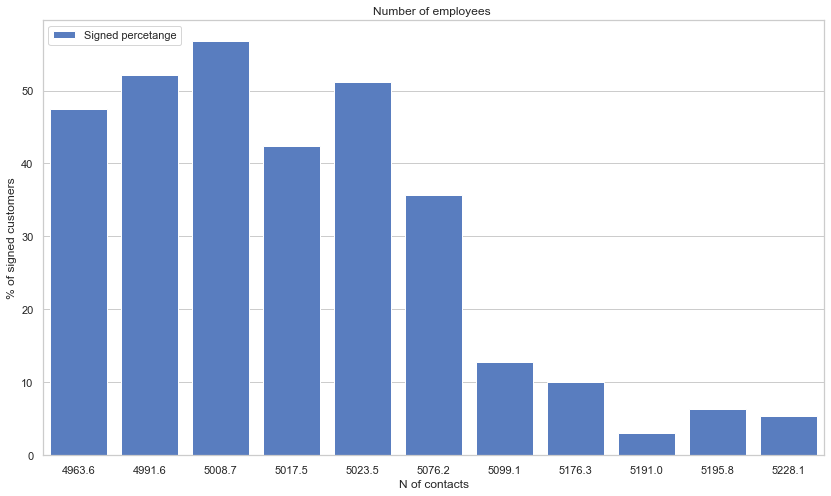

In [62]:
fig, ax = plt.subplots(figsize=(14, 8))
x_labels = list(df["poutcome"].value_counts().index)

sns.set_color_codes("muted")
sns.barplot(data = df, x = df.groupby("nr.employed")["y"].sum().index, 
            y =  df.groupby("nr.employed")["y"].sum()/df.groupby("nr.employed")["y"].count()*100, 
            color = "b", label = "Signed percetange")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set_xlabel("N of contacts")
ax.set_ylabel("% of signed customers")
ax.set_title("Number of employees ")
plt.savefig("./img/nr_employees.png")

##### types of data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  object 
 1   marital         41188 non-null  object 
 2   education       41188 non-null  object 
 3   default         41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  poutcome        41188 non-null  object 
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  int64  
 16  new_age         41188 non-null  object 
 17  pdays_new       41188 non-null 

In [64]:
df["cons.price.idx"] = df["cons.price.idx"].astype("object")

In [65]:
df["cons.conf.idx"] = df["cons.price.idx"].astype("object")

In [66]:
df["pdays_new"] = df["pdays_new"].astype("object")

In [67]:
# # visualize our finalized selection of feature/condition variables with pair grid
# #c = ['price', 'bedrooms', 'grade_code', 'age', 'waterfront_coded', 'sqft_living']

# g = sns.PairGrid(df)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.regplot);

# Modeling

In [68]:
def transformation(X_train, X_test):
        
        """
        Function to automatically divide data into categorical and numerical parts and
        transform data based on data type
        """
        
        # Initialize basic transformation functions. 
        encoder = OneHotEncoder(handle_unknown='ignore', drop = "first")
        scaler = StandardScaler()
        
        # Numerical columns transformation
        X_train_num = X_train.select_dtypes(include = np.number)
        X_test_num = X_test.select_dtypes(include = np.number)
        scaler.fit(X_train_num) # Train scaler transformer
        
        # Apply scaler to numerical train and test columns.
        # And Recreate dataframe with new data.
        X_train_num_ss = pd.DataFrame(data = scaler.transform(X_train_num), index = X_train_num.index, 
                                      columns = scaler.get_feature_names_out())
        X_test_num_ss = pd.DataFrame(data = scaler.transform(X_test_num), index = X_test_num.index, 
                                      columns = scaler.get_feature_names_out())
 
        # Categorical transformation
        X_train_cat = X_train.select_dtypes(include = [object, 'category'])
        X_test_cat = X_test.select_dtypes(include = [object, 'category'])
        encoder.fit(X_train_cat) # Train categorical transformer on train data
        
        # Apply categorical tranformer to categorical train and test columns.
        # And Recreate dataframe with new data.
        X_train_cat_encoded = pd.DataFrame(data = encoder.transform(X_train_cat).todense(), index = X_train_cat.index, 
                                           columns = encoder.get_feature_names_out())
        X_test_cat_encoded = pd.DataFrame(data = encoder.transform(X_test_cat).todense(), index = X_test_cat.index, 
                                           columns = encoder.get_feature_names_out())
        
        # Combine numerical and categorial columns
        X_train = pd.concat([X_train_num_ss, X_train_cat_encoded], axis = 1)
        X_test = pd.concat([X_test_num_ss, X_test_cat_encoded], axis = 1)
        
        return X_train, X_test

In [69]:
def cost_calculator(y, y_hat, X_test):
    
    """
    Function that will calculate the money balance of different models.
    """
    
    call_cost = conf.cost
    revenue = conf.revenue
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    TP = sum((y == y_hat) & (y_hat == 1))
    TN = sum((y == y_hat) & (y_hat == 0))
    FP = sum((y != y_hat) & (y_hat > y))
    FN = sum((y != y_hat) & (y_hat < y))
    
    # balance = revenue from customer - loss from customers who didn't sign up 
    # minus loss of profit from customers who can sign up but wasn't contacted.
    # balance = TP * (conf.revenue - conf.cost) - FP * conf.cost # To be deleted later
    balance = TP * conf.revenue - sum(conf.cost * X_test["campaign"][(y == y_hat) & (y_hat == 1)]) - sum(conf.cost * X_test["campaign"][(y != y_hat) & (y_hat > y)]) 
    
    return balance
    

In [70]:
def check_metrics_balance(results, X_test, y_test):
    estimator = results["estimator"][0]
    y_hat_test = estimator.predict(X_test_ss_oha)
    balance = cost_calculator(y_test, y_hat_test, X_test)
    print("Baseline model mean recall: " , np.mean(list(results["test_recall"])))
    print("Baseline model mean accuracy: " , np.mean(list(results['test_accuracy'])))
    print(f"Model balance {balance}")
    
    

In [71]:
# Define Predictors and predictable variable
y = df["y"]
X = df.drop("y", axis = 1)

In [72]:
# Perform split to Training and testing data
# X_test and y_test will be used for the finall validation. 
# X_new will be splitted into train and validation data.
X_new, X_test, y_new, y_test = train_test_split(X, y, test_size = 0.2)


##### Baseline model

In [73]:
# Banchmark balance
# benchmark = sum(y_test == 1) * conf.revenue - len(y_test)* conf.cost # to be deleted later
def calculate_benchmark(y_test, X_test):
    benchmark=sum(y_test == 1) * conf.revenue - sum(X_test["campaign"])* conf.cost
    return benchmark

In [74]:
benchmark = calculate_benchmark(y_test,X_test)
benchmark

84055

In [75]:
# For baseline model

In [76]:
X_ss_oha, X_test_ss_oha = transformation(X_new, X_test)

In [77]:
X_ss_oha.shape

(32950, 124)

In [78]:
logreg = LogisticRegression()
kf = StratifiedKFold(3, shuffle = True)

In [79]:
results_baseline = cross_validate(logreg, X = X_ss_oha, y = y_new, cv = kf, scoring = ["accuracy", "recall"], return_estimator=True)

In [80]:
check_metrics_balance(results_baseline, X_test_ss_oha, y_test)

Baseline model mean recall:  0.24464334147002983
Baseline model mean accuracy:  0.9004551843645802
Model balance 45711.70623750126


##### Baseline model with class imbalance1

In [81]:
logreg2 = LogisticRegression(class_weight = {1:10, 0:1})
result_baseline_weight = cross_validate(logreg2, X = X_ss_oha, y = y_new, cv = kf, scoring = ["accuracy", "recall"], return_estimator=True)

In [82]:
check_metrics_balance(result_baseline_weight, X_test_ss_oha, y_test)

Baseline model mean recall:  0.6623270951993491
Baseline model mean accuracy:  0.7943551088699463
Model balance 132389.80199182304


##### Baseline model with class imbalance1

In [83]:
sm = SMOTE(sampling_strategy = 0.5)
X_train_sm, y_train_sm = sm.fit_resample(X_ss_oha, y_new)
logreg3 = LogisticRegression(class_weight = {1:3, 0:1})
result_baseline_weight_sm= cross_validate(logreg3, X = X_train_sm, y = y_train_sm, cv = kf, scoring = ["accuracy", "recall"], return_estimator=True)

In [84]:
check_metrics_balance(result_baseline_weight_sm, X_test_ss_oha, y_test)

Baseline model mean recall:  0.7351513908823731
Baseline model mean accuracy:  0.7208730571213507
Model balance 143214.83034924834


##### Basic models without tuning 

In [85]:
# Lets define function to check our models.
def get_score(X, y,  model = LogisticRegression(max_iter = 1000),cv = kf, grid_search = False, grid = None):

    # Timing, for debugging and comparison purposes
    start = time.time()
    
    # Define our model
    model_used = model
    print(f"Model {model_used} calculations:")
       
    # Imbalance problem, resample
    X_train_sm, y_train_sm = sm.fit_resample(X, y)
    
    
    # Cross validation
    cv_results = cross_validate(model_used, X = X_train_sm, y = y_train_sm, scoring = ["recall", "accuracy", "roc_auc"], cv = cv, return_train_score=True, return_estimator = True)
    estimator = cv_results["estimator"][0]
    train_accuracy =np.mean(cv_results["train_accuracy"]) 
    train_recall = np.mean(cv_results["train_recall"]) 
    validation_accuracy = np.mean(cv_results["test_accuracy"]) 
    validation_recall = np.mean(cv_results["test_recall"]) 
    fit_time = np.mean(cv_results["fit_time"])
    
    # Predictions for unseen test data (global namespace)
    y_test_hat = estimator.predict(X_test_ohe_ss)
    
    # Test results
    test_accuracy = accuracy_score(y_test, y_test_hat)
    test_recall = recall_score(y_test, y_test_hat)
    test_precition = precision_score(y_test, y_test_hat)
    test_auc = roc_auc_score(y_test, y_test_hat)
    balance = cost_calculator(y_test, y_test_hat, X_test)
    
    
  
    # Confusion matrix and other instruments
    print(f"confusion matrix:")
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize = (14, 6))
    axs1.set_title(key + " Confusion matrix")
    axs2.set_title(key + " roc curve")
    cm = confusion_matrix(y_test, y_test_hat)
    ConfusionMatrixDisplay(confusion_matrix = cm ).plot(ax = axs1)
    plot_roc_curve(estimator, X_test_ohe_ss, y_test, ax = axs2)
    
    plt.show()
    end = time.time()
    print ("Time elapsed:", end - start)
    
    return (train_accuracy, train_recall, validation_accuracy,validation_recall, test_accuracy, test_recall, test_auc, end - start, estimator, balance)


In [86]:
Model_list = {"Gaussian Naive Bayes":GaussianNB(),"Logistic Regression": LogisticRegression(class_weight = {1:3, 0:1}), "Decision tree": DecisionTreeClassifier(class_weight = {1:3, 0:1}) ,
              "Random Forest": RandomForestClassifier(class_weight = {1:3, 0:1}),  "Gradient Boosting":GradientBoostingClassifier() ,
             "Ada Boost":AdaBoostClassifier(), "KNeighbors": KNeighborsClassifier()}



"""
Gaussian Naive Bayes
+ Fast
+ Scalable for big datasets
+ Good for multiclass

- Probabilites can't be trusted all the times
- Not good for imbalance problems without smoothing
- Naive (we assume that predictors independent)

Usage: Text classifications/sentiments/recommendations/multiclass 

----------

Logistic Regression
+ Simple and easy to implement (for example we can avoid features scaling)
+ Good generalization
+ Parametric model
+ L2 regulization allows to 0 unused features

- Not the best performance
- Problems with multicollinearity

Usage: Binary class

--------- 

Decision tree:
+ Can be visualized and explained
+ Scaling not always needed
+ Can handle missing data

- overfitting

General usage


--------
Random forest:

Many small decision trees algorithms

+ less prone to overfit
+ good performance for imbalance data
+ Better generalize

- Longer training time
- Black box algorithm

---- 
Gradient boosting
Use week learners to make better predictions (target on errors of previous iteration to reduce the error)
+ Good accuracy
+ easy to implement (can work without data preprocessing)
+ handle missing data

- need tweeks to find optimal performance
- overfitting 

General usage

----
ada boosting
Use week learners to make better predictions (voting between week learners)
+ Good accuracy
+ easy to implement (can work without data preprocessing)
+ handle missing data

- need tweeks to find optimal performance
- overfitting 

General usage

----
K Nearest Neighbors 
Distance based algorithm.
+ simple
+ almost no tuning

- Slow 
- Curse of dimensionality
- Scaling is super important


Classification problems when you don't understand to form of separation. 
"""


"\nGaussian Naive Bayes\n+ Fast\n+ Scalable for big datasets\n+ Good for multiclass\n\n- Probabilites can't be trusted all the times\n- Not good for imbalance problems without smoothing\n- Naive (we assume that predictors independent)\n\nUsage: Text classifications/sentiments/recommendations/multiclass \n\n----------\n\nLogistic Regression\n+ Simple and easy to implement (for example we can avoid features scaling)\n+ Good generalization\n+ Parametric model\n+ L2 regulization allows to 0 unused features\n\n- Not the best performance\n- Problems with multicollinearity\n\nUsage: Binary class\n\n--------- \n\nDecision tree:\n+ Can be visualized and explained\n+ Scaling not always needed\n+ Can handle missing data\n\n- overfitting\n\nGeneral usage\n\n\n--------\nRandom forest:\n\nMany small decision trees algorithms\n\n+ less prone to overfit\n+ good performance for imbalance data\n+ Better generalize\n\n- Longer training time\n- Black box algorithm\n\n---- \nGradient boosting\nUse week lea

Model GaussianNB() calculations:
confusion matrix:


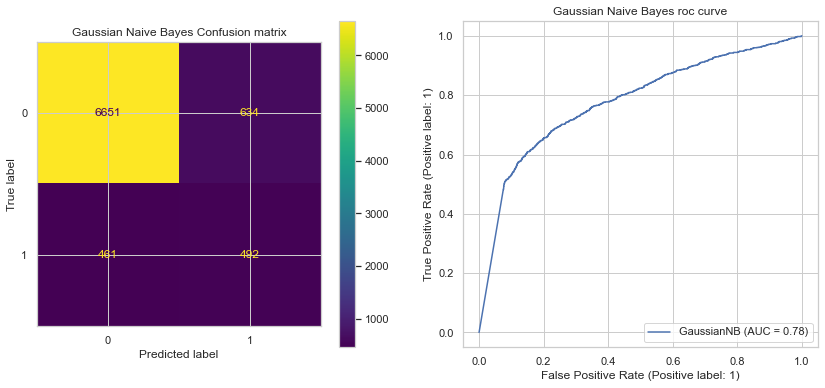

Time elapsed: 3.3238298892974854
Model LogisticRegression(class_weight={0: 1, 1: 3}) calculations:
confusion matrix:


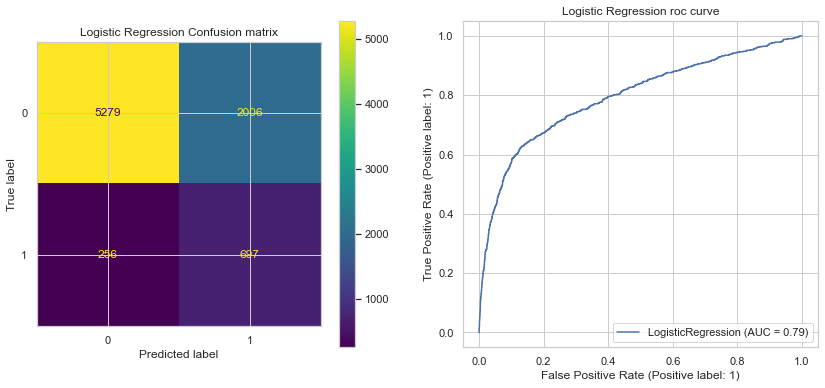

Time elapsed: 4.460770130157471
Model DecisionTreeClassifier(class_weight={0: 1, 1: 3}) calculations:
confusion matrix:


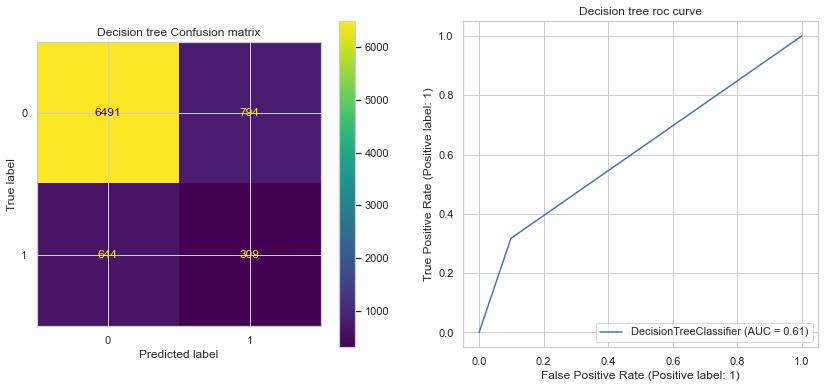

Time elapsed: 4.435340881347656
Model RandomForestClassifier(class_weight={0: 1, 1: 3}) calculations:
confusion matrix:


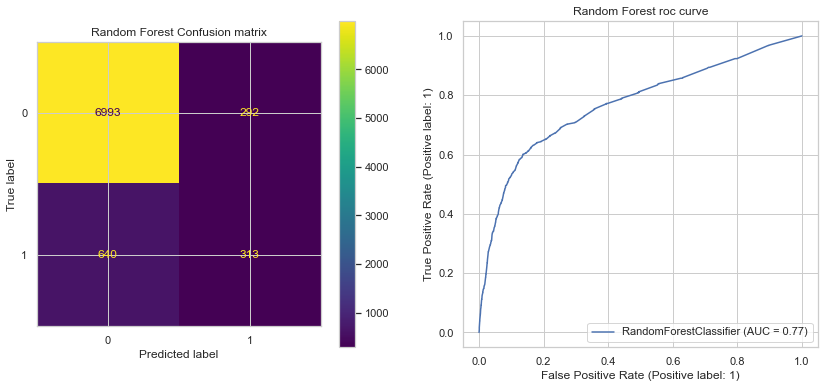

Time elapsed: 33.851277112960815
Model GradientBoostingClassifier() calculations:
confusion matrix:


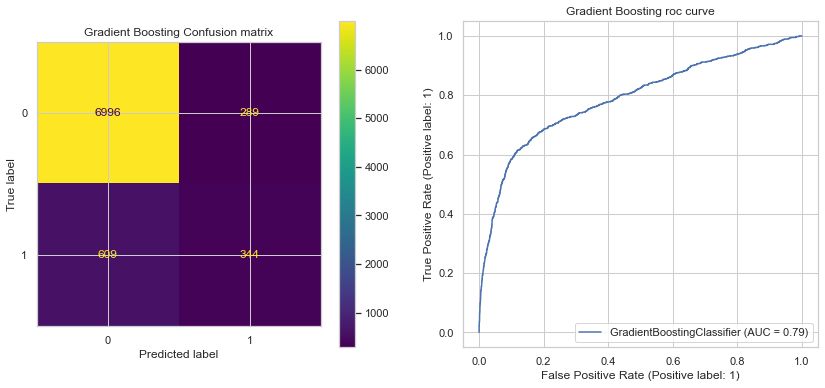

Time elapsed: 39.853272914886475
Model AdaBoostClassifier() calculations:
confusion matrix:


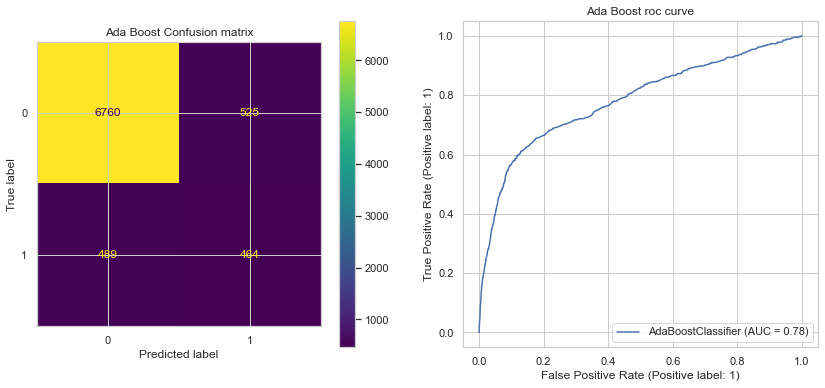

Time elapsed: 17.750622272491455
Model KNeighborsClassifier() calculations:
confusion matrix:


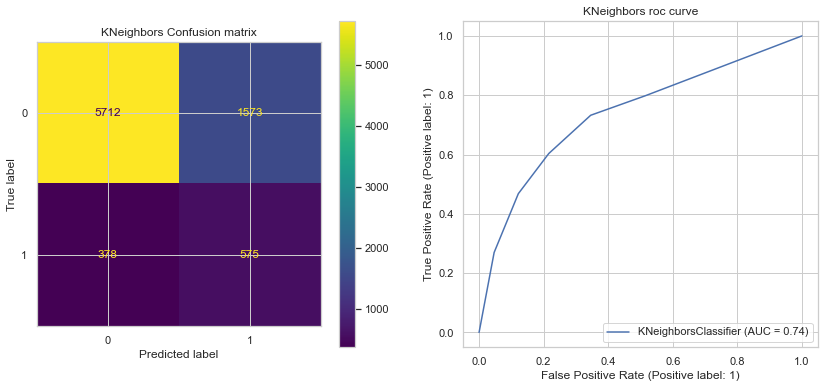

Time elapsed: 283.4970541000366


In [87]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

columns_df = ["Model name", "Train accuracy", "Train recall", "Validation accuracy", "Validation recall", "Test accuracy", "Test recall", "Test AUC", "Balance", "Execution time"]
Different_models_imbalance_1 = pd.DataFrame(columns = columns_df)

X_train_ohe_ss, X_test_ohe_ss= transformation(X_new, X_test)
estimators =[]

for key, value in Model_list.items():
    results = get_score(X_train_ohe_ss, y_new, value);
    line = pd.DataFrame(np.array([[key, round(results[0], 4), round(results[1], 4), round(results[2], 4), round(results[3], 4), round(results[4],4), round(results[5],4), round(results[6],4),round(results[9],4), round(results[7], 4)]]), columns = columns_df)
    Different_models_imbalance_1 = pd.concat([Different_models_imbalance_1,line], axis = 0)
    estimators.append((key, results[8]))
    

In [88]:
Different_models_imbalance_1

,Model name,Train accuracy,Train recall,Validation accuracy,Validation recall,Test accuracy,Test recall,Test AUC,Balance,Execution time
0,Gaussian Naive Bayes,0.7853,0.5252,0.7853,0.5253,0.8671,0.5163,0.7146,87705,3.3238
0,Logistic Regression,0.7261,0.7246,0.7253,0.7235,0.7254,0.7314,0.728,114180,4.4608
0,Decision tree,0.995,0.9996,0.8634,0.8142,0.8254,0.3242,0.6076,50220,4.4353
0,Random Forest,0.9953,0.9974,0.9169,0.8305,0.8869,0.3284,0.6442,57430,33.8513
0,Gradient Boosting,0.904,0.7845,0.9007,0.7801,0.891,0.361,0.6606,63660,39.8533
0,Ada Boost,0.8558,0.7034,0.855,0.702,0.8769,0.4869,0.7074,84195,17.7506
0,KNeighbors,0.8807,0.9554,0.8228,0.905,0.7632,0.6034,0.6937,92370,283.4971


##### Model optimization

In [89]:
# Logistic regression

In [90]:
Logreg_opt = LogisticRegression()

In [91]:
# Search grid for logistic regression
grid = {"class_weight":[{0:1, 1:3}], "C":[0.01, 0.1, 1], "solver":["lbfgs","liblinear", "saga"]}

In [92]:
# Setup grid search
gs = GridSearchCV(estimator = Logreg_opt, param_grid = grid, cv = 4, scoring = ["recall", "accuracy"], refit = "recall")

In [93]:
# Fitting data
X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe_ss, y_new)
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'class_weight': [{0: 1, 1: 3}],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             refit='recall', scoring=['recall', 'accuracy'])

In [94]:
# Results
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_solver,params,split0_test_recall,split1_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.494392,0.081024,0.016858,0.001690,0.01,"{0: 1, 1: 3}",lbfgs,"{'C': 0.01, 'class_weight': {0: 1, 1: 3}, 'sol...",0.719245,0.731001,...,0.722644,0.007757,1,0.721706,0.732641,0.721134,0.728789,0.726067,0.004847,2
1,0.296630,0.015772,0.012210,0.001192,0.01,"{0: 1, 1: 3}",liblinear,"{'C': 0.01, 'class_weight': {0: 1, 1: 3}, 'sol...",0.718152,0.728267,...,0.721482,0.007329,9,0.722161,0.733461,0.721954,0.728515,0.726523,0.004796,1
2,1.484615,0.201713,0.011363,0.001527,0.01,"{0: 1, 1: 3}",saga,"{'C': 0.01, 'class_weight': {0: 1, 1: 3}, 'sol...",0.719245,0.731001,...,0.722644,0.007757,1,0.721706,0.732641,0.721134,0.728789,0.726067,0.004847,2
3,0.861058,0.033916,0.018245,0.002311,0.1,"{0: 1, 1: 3}",lbfgs,"{'C': 0.1, 'class_weight': {0: 1, 1: 3}, 'solv...",0.715692,0.732094,...,0.722371,0.008190,5,0.718516,0.730727,0.722592,0.730156,0.725498,0.005153,5
4,0.504604,0.039222,0.016712,0.005184,0.1,"{0: 1, 1: 3}",liblinear,"{'C': 0.1, 'class_weight': {0: 1, 1: 3}, 'solv...",0.715692,0.731547,...,0.722029,0.008135,8,0.718334,0.731547,0.722774,0.729882,0.725635,0.005350,4
5,5.242741,0.655019,0.011200,0.001433,0.1,"{0: 1, 1: 3}",saga,"{'C': 0.1, 'class_weight': {0: 1, 1: 3}, 'solv...",0.715965,0.732094,...,0.722507,0.008189,4,0.718243,0.730727,0.722774,0.730156,0.725475,0.005222,6
6,0.740624,0.025879,0.015297,0.000717,1,"{0: 1, 1: 3}",lbfgs,"{'C': 1, 'class_weight': {0: 1, 1: 3}, 'solver...",0.715418,0.731001,...,0.722576,0.007731,3,0.718243,0.729543,0.721407,0.730065,0.724814,0.005116,9
7,0.753047,0.073932,0.012873,0.001717,1,"{0: 1, 1: 3}",liblinear,"{'C': 1, 'class_weight': {0: 1, 1: 3}, 'solver...",0.714325,0.731274,...,0.722166,0.008018,7,0.717970,0.730089,0.722501,0.730156,0.725179,0.005197,8
8,6.033471,0.255448,0.012718,0.003773,1,"{0: 1, 1: 3}",saga,"{'C': 1, 'class_weight': {0: 1, 1: 3}, 'solver...",0.714872,0.731001,...,0.722234,0.007810,6,0.718061,0.729998,0.722501,0.730247,0.725202,0.005166,7


In [95]:
# Gaussian Naive Bayes

In [96]:
NB = GaussianNB()

In [97]:
# Search grid for Naive Bayes
grid = {"var_smoothing":[1e-09, 1e-06, 1e-10, 1e-12]}

In [98]:
# Setup grid search
gs = GridSearchCV(estimator = NB, param_grid = grid, cv = 4, scoring = ["recall", "accuracy"], refit = "recall")
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-06, 1e-10, 1e-12]},
             refit='recall', scoring=['recall', 'accuracy'])

In [99]:
# Results
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.130235,0.021441,0.027914,0.000916,0.0,{'var_smoothing': 1e-09},0.527884,0.524057,0.532404,0.518316,0.525665,0.005170,3,0.783853,0.788227,0.785382,0.783833,0.785324,0.001790,1
1,0.113520,0.005202,0.026041,0.000632,0.000001,{'var_smoothing': 1e-06},0.513669,0.509568,0.518731,0.506561,0.512132,0.004569,4,0.784126,0.786586,0.785018,0.782739,0.784617,0.001397,2
2,0.115053,0.003676,0.027530,0.001563,0.0,{'var_smoothing': 1e-10},0.535265,0.527611,0.537326,0.521597,0.530450,0.006263,2,0.782850,0.786860,0.784198,0.783924,0.784458,0.001475,3
3,0.117236,0.007183,0.028785,0.002464,0.0,{'var_smoothing': 1e-12},0.580919,0.572444,0.589281,0.528157,0.567700,0.023593,1,0.777201,0.789502,0.786020,0.781828,0.783638,0.004604,4


In [100]:
# Decision Tree

In [101]:
dt = DecisionTreeClassifier()

In [102]:
# Search grid
grid = {"min_samples_leaf":[1, 2, 3], "max_leaf_nodes":[10, 5, 4, 2], "max_depth":[3, 5, 10], "class_weight":[{1:3, 0:1}]}

In [103]:
gs = GridSearchCV(estimator = dt, param_grid = grid, cv = 4, scoring = ["recall", "accuracy"], refit = "recall")
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 3}],
                         'max_depth': [3, 5, 10],
                         'max_leaf_nodes': [10, 5, 4, 2],
                         'min_samples_leaf': [1, 2, 3]},
             refit='recall', scoring=['recall', 'accuracy'])

In [104]:
# Results
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.168377,0.039552,0.014867,0.000405,"{1: 3, 0: 1}",3,10,1,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.680153,...,0.707881,0.017144,19,0.730272,0.723255,0.730703,0.733254,0.729371,0.003710,16
1,0.156538,0.004224,0.014665,0.000651,"{1: 3, 0: 1}",3,10,2,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.680153,...,0.707881,0.017144,19,0.730272,0.723255,0.730703,0.733254,0.729371,0.003710,16
2,0.151182,0.001189,0.015053,0.000541,"{1: 3, 0: 1}",3,10,3,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.680153,...,0.707881,0.017144,19,0.730272,0.723255,0.730703,0.733254,0.729371,0.003710,16
3,0.146242,0.008015,0.014619,0.000808,"{1: 3, 0: 1}",3,5,1,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.716698,0.007189,1,0.716785,0.723255,0.716942,0.717488,0.718618,0.002690,19
4,0.144640,0.012448,0.015163,0.001261,"{1: 3, 0: 1}",3,5,2,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.716698,0.007189,1,0.716785,0.723255,0.716942,0.717488,0.718618,0.002690,19
5,0.144072,0.009017,0.014504,0.000974,"{1: 3, 0: 1}",3,5,3,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.716698,0.007189,1,0.716785,0.723255,0.716942,0.717488,0.718618,0.002690,19
6,0.135485,0.012646,0.014062,0.001015,"{1: 3, 0: 1}",3,4,1,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.710820,0.005843,10,0.716785,0.721159,0.714937,0.715028,0.716977,0.002524,28
7,0.142859,0.008656,0.015066,0.001271,"{1: 3, 0: 1}",3,4,2,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.710820,0.005843,10,0.716785,0.721159,0.714937,0.715028,0.716977,0.002524,28
8,0.138577,0.011101,0.014162,0.001437,"{1: 3, 0: 1}",3,4,3,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.710820,0.005843,10,0.716785,0.721159,0.714937,0.715028,0.716977,0.002524,28
9,0.111450,0.002794,0.014408,0.001110,"{1: 3, 0: 1}",3,2,1,"{'class_weight': {1: 3, 0: 1}, 'max_depth': 3,...",0.708857,...,0.650404,0.100326,28,0.716785,0.777201,0.714937,0.715028,0.730988,0.026691,7


##### Finall model

In [105]:
def Model_CV(X_new, y_new, model = LogisticRegression()):
    # prepare the list of results
    Recall_train_list = []
    Recall_test_list = []
    Accuracy_train_list = []
    Accuracy_test_list = []
    model_input = model
    for train_index, test_index in kf.split(X_new, y_new): #We defined kf before. 
        X_train, X_test = X_new.iloc[train_index,:], X_new.iloc[test_index,:]
        y_train, y_test = y_new.iloc[train_index], y_new.iloc[test_index]
        
        # Data transormation based on previous function
        X_train, X_test = transformation(X_train, X_test)

        #Modeling
        model = model_input          # Define our model based on function inputs
        model.fit(X_train, y_train)  # Train the model based on train data. 
        y_train_hat = model.predict(X_train)  # Predict Y train
        y_test_hat = model.predict(X_test)    # Preduct Y test
        
        #Calculate scores
        Accuracy_train = accuracy_score(y_train, y_train_hat)
        Accuracy_test = accuracy_score(y_test, y_test_hat)
        Recall_train = recall_score(y_train, y_train_hat)
        Recall_test = recall_score(y_test, y_test_hat)
        
        #Add scores for each split into overall list of scores
        Accuracy_train_list.append(Accuracy_train)
        Accuracy_test_list.append(Accuracy_test)
        Recall_train_list.append(Recall_train)
        Recall_test_list.append(Recall_test)
    
#     # Find mean values and standard deviation of test scores.
#     print(f"Accuracy train {np.mean(Accuracy_train_list)}")
#     print(f"Accuracy test {np.mean(Accuracy_test_list)}")
#     print(f"Recall train {np.mean(Recall_train_list)}")
#     print(f"Recall test {np.mean(Recall_test_list)}")
#     cm = confusion_matrix(y_test, y_test_hat)
#     ConfusionMatrixDisplay(confusion_matrix = cm).plot()
#     plot_roc_curve(model, X_test, y_test)
    
    return model

In [106]:
Logreg_finall = LogisticRegression(class_weight = {1:3, 0:1}, C = 0.01, solver = "saga")
sm = SMOTE(sampling_strategy = 0.5)
X_train_sm, y_train_sm = sm.fit_resample(X_train_ohe_ss, y_new)
model_final = Model_CV(X_train_sm, y_train_sm, Logreg_finall)



#.fit(X_train_sm, y_train_sm)

Final model recall 0.7649527806925498
Final model accuracy 0.6646030589949017
Final model balance 116450
Confusion matrix:


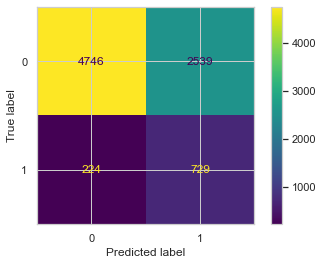

In [107]:
y_hat_final = model_final.predict(X_test_ss_oha)
y_hat_probability = model_final.predict_proba(X_test_ss_oha)
print(f"Final model recall {recall_score(y_test, y_hat_final)}")
print(f"Final model accuracy {accuracy_score(y_test, y_hat_final)}")
print(f"Final model balance {cost_calculator(y_test, y_hat_final, X_test)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_hat_final)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()

# 114180

### Check decision boundaries

In [108]:
# Loop with changing prediction bondaries

predictions = y_hat_probability[:,1]

list_of_thresholds = list(np.linspace(0.1, 0.9, 100))
list_of_options=[]
for threshold in list_of_thresholds:
    prediction_new = np.array([1 if x > threshold else 0 for x in predictions])
    test_accuracy = round(accuracy_score(y_test, prediction_new),4)
    test_recall = round(recall_score(y_test, prediction_new),4)
    test_precision = round(precision_score(y_test, prediction_new),4)
    test_balance = round(cost_calculator(y_test, prediction_new, X_test),4)
    list_of_options.append((threshold, test_accuracy, test_recall, test_balance))

# Do not do anything strategy
print("Do not do anything strategy")
print("Balance: ", calculate_benchmark(y_test,X_test))
print("-----------")


# Base model predictions
print("Base model: prediction boundary - 0.5")
print(f"Model accuracy {round(accuracy_score(y_test, y_hat_final), 4)}. Model recall {round(recall_score(y_test, y_hat_final),4)}. Model balance {round(cost_calculator(y_test, y_hat_final, X_test),4)}")
print("-----------")

# Best prediction threshold for accuracy
threshold_acc = sorted(list_of_options, key = lambda x: x[1], reverse = True)[0]
print("Optimization focused on accuracy: prediction boundary - ", round(threshold_acc[0],3))
print(f"Model accuracy {threshold_acc[1]}. Model recall {threshold_acc[2]}. Model balance {threshold_acc[3]}")
print("-----------")


# Best prediction threshold for recall
threshold_recall = sorted(list_of_options, key = lambda x: x[2], reverse = True)[0]
print("Optimization focused on recall: prediction boundary - ", round(threshold_recall[0],3))
print(f"Model accuracy {threshold_recall[1]}. Model recall {threshold_recall[2]}. Model balance {threshold_recall[3]}")
print("-----------")

# Best prediction threshold for balance
threshold_balance = sorted(list_of_options, key = lambda x: x[3], reverse = True)[0]
print("Optimization focused on balance: prediction boundary - ", round(threshold_balance[0],3))
print(f"Model accuracy {threshold_balance[1]}. Model recall {threshold_balance[2]}. Model balance {threshold_balance[3]}")
print("-----------")



Do not do anything strategy
Balance:  84055
-----------
Base model: prediction boundary - 0.5
Model accuracy 0.6646. Model recall 0.765. Model balance 116450
-----------
Optimization focused on accuracy: prediction boundary -  0.763
Model accuracy 0.8931. Model recall 0.2099. Model balance 37455
-----------
Optimization focused on recall: prediction boundary -  0.1
Model accuracy 0.116. Model recall 1.0. Model balance 84600
-----------
Optimization focused on balance: prediction boundary -  0.464
Model accuracy 0.5374. Model recall 0.8395. Model balance 118800
-----------


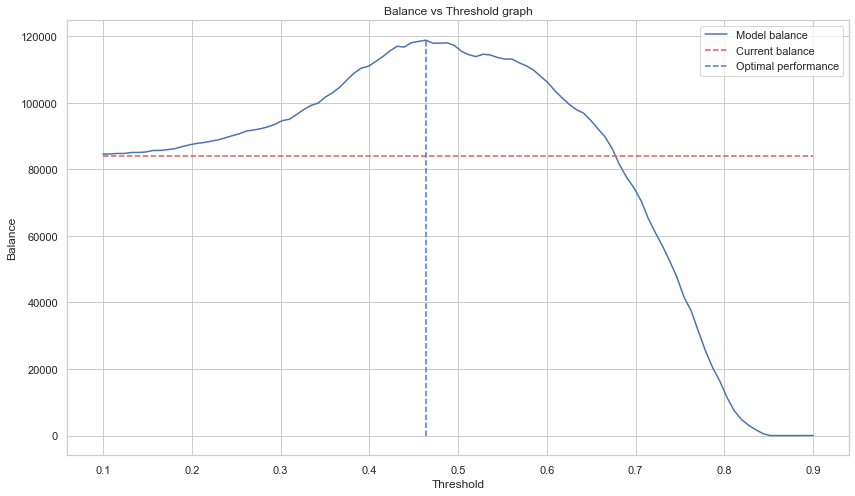

In [109]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data = list_of_options, x = [item[0] for item in list_of_options], y = [item[3] for item in list_of_options], label = "Model balance")
ax.set_xlabel("Threshold")
ax.set_ylabel("Balance")
ax.set_title("Balance vs Threshold graph")
ax.hlines(benchmark, xmin=0.1, xmax=0.9, linestyle = "--", color = "r", label = "Current balance")
ax.vlines(round(threshold_balance[0],3), ymin=0, ymax=threshold_balance[3], linestyle = "--", color = "b", label = "Optimal performance")
plt.legend()
plt.savefig("./img/ThesholdBal.png")

### Most contributing factors

In [110]:
# We work with Linear regression. 
# This is parametric model that can be 

In [111]:
list_factors = []
for i in list(range(len(model_final.feature_names_in_))):
    tu = tuple([model_final.feature_names_in_[i], model_final.coef_[0][i]])
    list_factors.append(tu)

In [112]:
# Negative influence (reduce probablilty of injuries during car crash)
Biggest_negative_influence = sorted(list_factors, key = lambda x : x[1])[:10]
Biggest_negative_influence = pd.DataFrame(Biggest_negative_influence, columns = ["Reason", "Influence"])

In [113]:
# Positive influence (increase probablilty of injuries during car crash)
Biggest_influence = sorted(list_factors, key = lambda x : x[1], reverse = True)[:10]
Biggest_influence = pd.DataFrame(Biggest_influence, columns = ["Reason", "Influence"])

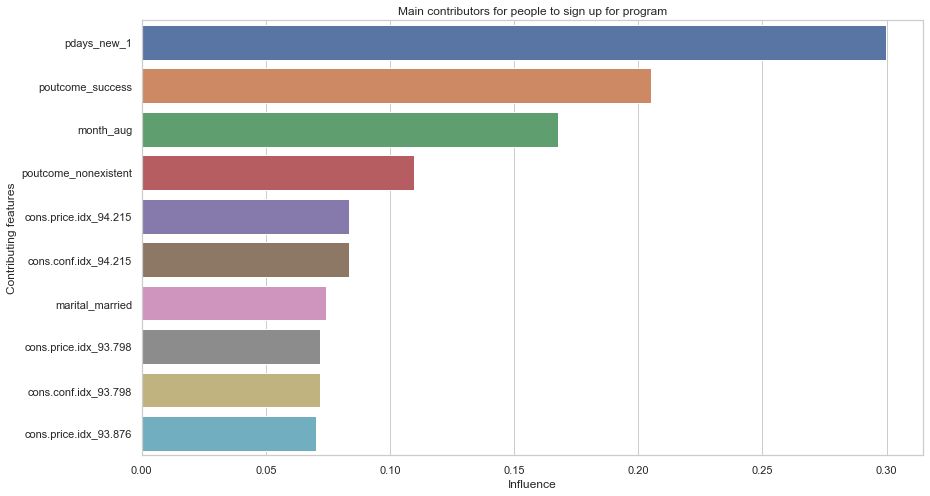

In [114]:
# Lets make a graph with main contributors
y_labels = list(Biggest_influence["Reason"])
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data = Biggest_influence, y = "Reason", x = "Influence", )
ax.set_xlabel("Influence")
ax.set_ylabel("Contributing features")
ax.set_title("Main contributors for people to sign up for program")
ax.set_yticklabels(y_labels);
plt.savefig("./img/Main_contributors.png")


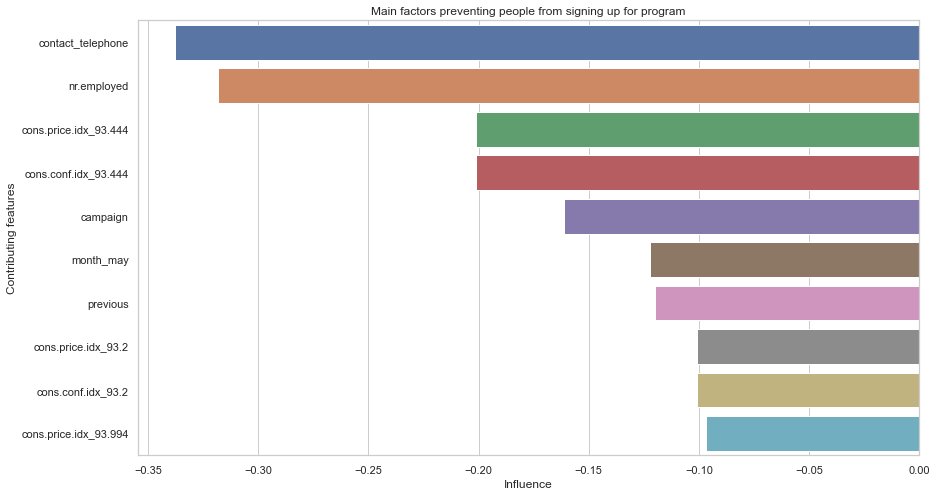

In [115]:
# Lets make a graph with parameters reduce the probability

y_labels = list(Biggest_negative_influence["Reason"])
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data = Biggest_negative_influence, y = "Reason", x = "Influence")
ax.set_xlabel("Influence")
ax.set_ylabel("Contributing features")
ax.set_title("Main factors preventing people from signing up for program")
ax.set_yticklabels(y_labels);
plt.savefig("./img/Main_preventive_factors.png")

# Conclusion
---
For our finalized model, we used LinearRegression because of the following reasons: 
1) It is easy to interpret.

2) Generalization

3) It has a good recall compared to the other models without sacrificing precision. 

Overall we can achieve improvements in budget allocation compared to the initial stage. In this case, this happens due to excluding people from the marketing campaign who have an extremely low chance of subscribing to our services.
Results can be different depending on different costs associated with actions.

### What if... 
Let's see how our model performance change, if cost of the call was 10 and sign up revenue, was 100

In [119]:
conf.cost = 10
conf.revenue = 500

In [120]:
# Loop with changing prediction bondaries
benchmark_imagination = calculate_benchmark(y_test,X_test)
list_of_thresholds = list(np.linspace(0.1, 0.9, 100))
list_of_options=[]
for threshold in list_of_thresholds:
    prediction_new = np.array([1 if x > threshold else 0 for x in predictions])
    test_accuracy = round(accuracy_score(y_test, prediction_new),4)
    test_recall = round(recall_score(y_test, prediction_new),4)
    test_precision = round(precision_score(y_test, prediction_new),4)
    test_balance = round(cost_calculator(y_test, prediction_new, X_test),4)
    list_of_options.append((threshold, test_accuracy, test_recall, test_balance))

# Do not do anything strategy
print("Do not do anything strategy")
print("Balance: ", benchmark_imagination)
print("-----------")


# Base model predictions
print("Base model: prediction boundary - 0.5")
print(f"Model accuracy {round(accuracy_score(y_test, y_hat_final), 4)}. Model recall {round(recall_score(y_test, y_hat_final),4)}. Model balance {round(cost_calculator(y_test, y_hat_final, X_test),4)}")
print("-----------")

# Best prediction threshold for accuracy
threshold_acc = sorted(list_of_options, key = lambda x: x[1], reverse = True)[0]
print("Optimization focused on accuracy: prediction boundary - ", round(threshold_acc[0],3))
print(f"Model accuracy {threshold_acc[1]}. Model recall {threshold_acc[2]}. Model balance {threshold_acc[3]}")
print("-----------")


# Best prediction threshold for recall
threshold_recall = sorted(list_of_options, key = lambda x: x[2], reverse = True)[0]
print("Optimization focused on recall: prediction boundary - ", round(threshold_recall[0],3))
print(f"Model accuracy {threshold_recall[1]}. Model recall {threshold_recall[2]}. Model balance {threshold_recall[3]}")
print("-----------")

# Best prediction threshold for balance
threshold_balance = sorted(list_of_options, key = lambda x: x[3], reverse = True)[0]
print("Optimization focused on balance: prediction boundary - ", round(threshold_balance[0],3))
print(f"Model accuracy {threshold_balance[1]}. Model recall {threshold_balance[2]}. Model balance {threshold_balance[3]}")
print("-----------")

Do not do anything strategy
Balance:  263410
-----------
Base model: prediction boundary - 0.5
Model accuracy 0.6646. Model recall 0.765. Model balance 305800
-----------
Optimization focused on accuracy: prediction boundary -  0.763
Model accuracy 0.8931. Model recall 0.2099. Model balance 94910
-----------
Optimization focused on recall: prediction boundary -  0.1
Model accuracy 0.116. Model recall 1.0. Model balance 264500
-----------
Optimization focused on balance: prediction boundary -  0.431
Model accuracy 0.408. Model recall 0.8972. Model balance 319430
-----------


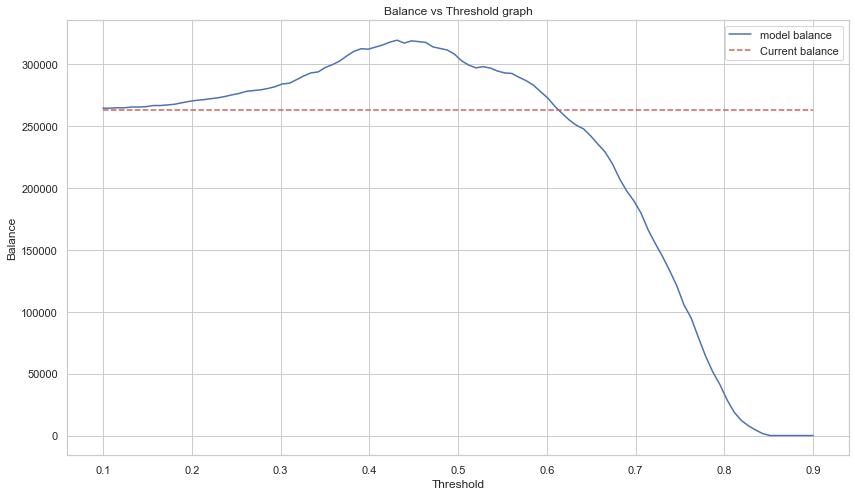

In [122]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data = list_of_options, x = [item[0] for item in list_of_options], y = [item[3] for item in list_of_options], label = "model balance")
ax.set_xlabel("Threshold")
ax.set_ylabel("Balance")
ax.set_title("Balance vs Threshold graph")
ax.hlines(benchmark_imagination, xmin=0.1, xmax=0.9, linestyle = "--", color = "r", label = "Current balance")
plt.legend()
plt.savefig("./img/imagine.png")

